In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

In [9]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


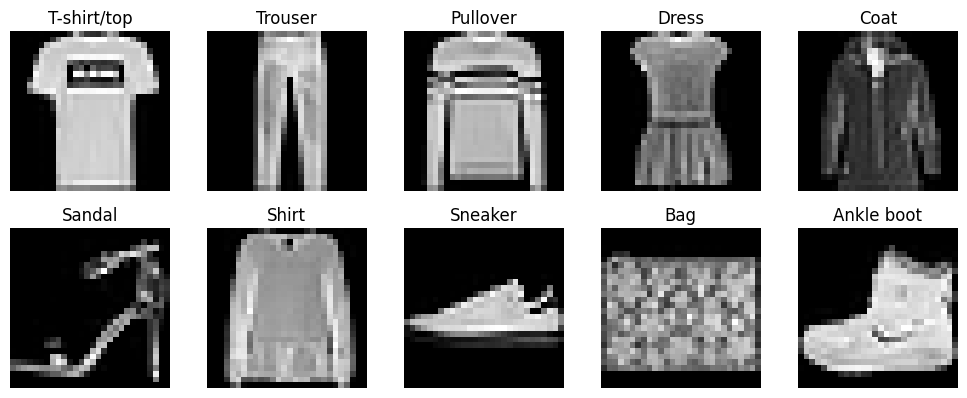

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))

for label in range(10):
  
    index = np.where(y_train == label)[0][0]
    
    plt.subplot(5, 5, label + 1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(class_labels[label])
    plt.axis('off')

plt.tight_layout()
plt.show()



In [17]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print("Training data shape after reshaping:", x_train.shape)
print("Test data shape after reshaping:", x_test.shape)


Training data shape after reshaping: (60000, 28, 28, 1)
Test data shape after reshaping: (10000, 28, 28, 1)


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
     Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


C:\Users\shali\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 138s 70ms/step - accuracy: 0.7274 - loss: 0.7585 - val_accuracy: 0.8637 - val_loss: 0.3707
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 159s 80ms/step - accuracy: 0.8593 - loss: 0.3916 - val_accuracy: 0.8674 - val_loss: 0.3493
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 206s 82ms/step - accuracy: 0.8805 - loss: 0.3295 - val_accuracy: 0.8907 - val_loss: 0.2962
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 187s 74ms/step - accuracy: 0.8916 - loss: 0.2946 - val_accuracy: 0.8989 - val_loss: 0.2771
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 145s 76ms/step - accuracy: 0.9009 - loss: 0.2749 - val_accuracy: 0.9016 - val_loss: 0.2631
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 282s 118ms/step - accuracy: 0.9082 - loss: 0.2487 - val_accuracy: 0.8984 - val_loss: 0.2705
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 255s 114ms/step - accuracy: 0.9118 - loss: 0.2357 - val_accuracy: 0.9028 - val_loss: 0.2582
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 261s 113ms/step - accurac

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.8514 - loss: 49.5788

Test accuracy: 0.8503000140190125


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step


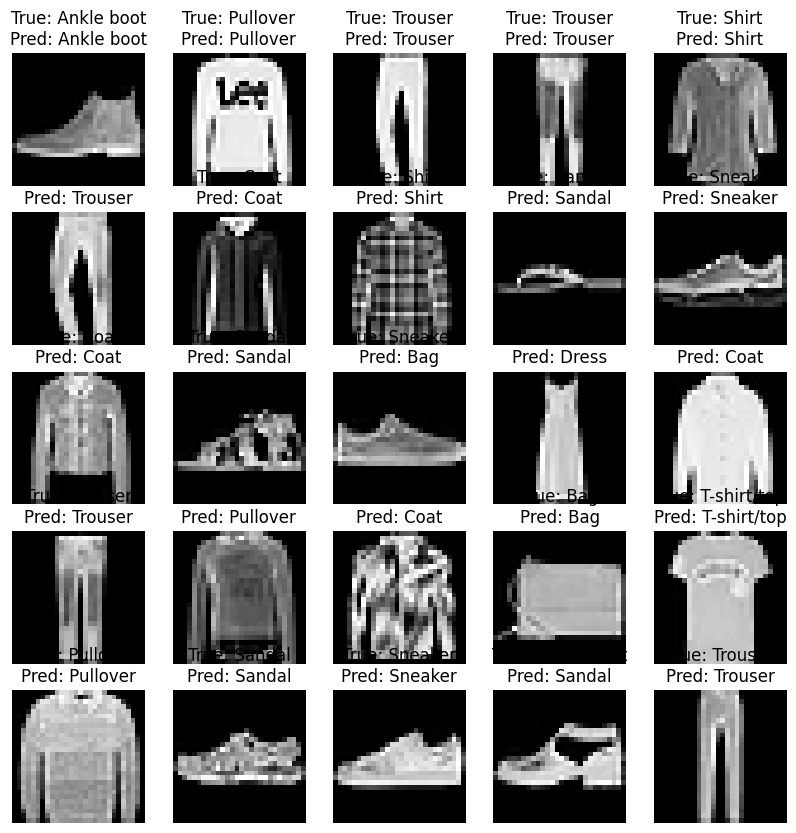

In [28]:
predictions = model.predict(x_test)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_labels[y_test[i]]}\nPred: {class_labels[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.show()
